In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('Data/finalTrain.csv')

In [3]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [5]:
df.shape

(45584, 20)

In [6]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [7]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [8]:
# dropping unnecessary columns
df1 = df.drop(['ID', 'Delivery_person_ID', 'Time_Order_picked','Restaurant_latitude','Restaurant_longitude',
                'Delivery_location_latitude','Delivery_location_longitude'], axis=1)
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,12-02-2022,21:55,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,13-02-2022,14:55,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,04-03-2022,17:30,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,13-02-2022,09:20,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,14-02-2022,19:50,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [9]:
# dropping 
df1.dropna(subset=['multiple_deliveries', 'Time_Orderd'], inplace=True)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42910 entries, 0 to 45583
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      42705 non-null  float64
 1   Delivery_person_Ratings  42652 non-null  float64
 2   Order_Date               42910 non-null  object 
 3   Time_Orderd              42910 non-null  object 
 4   Weather_conditions       42910 non-null  object 
 5   Road_traffic_density     42910 non-null  object 
 6   Vehicle_condition        42910 non-null  int64  
 7   Type_of_order            42910 non-null  object 
 8   Type_of_vehicle          42910 non-null  object 
 9   multiple_deliveries      42910 non-null  float64
 10  Festival                 42701 non-null  object 
 11  City                     41799 non-null  object 
 12  Time_taken (min)         42910 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 4.6+ MB


In [11]:
df1.isnull().sum()

Delivery_person_Age         205
Delivery_person_Ratings     258
Order_Date                    0
Time_Orderd                   0
Weather_conditions            0
Road_traffic_density          0
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries           0
Festival                    209
City                       1111
Time_taken (min)              0
dtype: int64

In [12]:
# Changing the datatypes of Order_Date
df1['Order_Date'] = pd.to_datetime(df1['Order_Date'])
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,2022-12-02,21:55,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,2022-02-13,14:55,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,2022-04-03,17:30,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,2022-02-13,09:20,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,2022-02-14,19:50,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [13]:
# Extracting Day, Month from Order_Date column and order_hour from Time_Ordered for further analysis
# Order year is 2022 so not extracting it separately and skipping order minute as well
 
df1['Order_Day'] = df1['Order_Date'].dt.dayofweek
df1['Order_Month'] = df1['Order_Date'].dt.month
df1['Order_hour'] = df1['Time_Orderd'].str.split(':').str[0]
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Order_Date,Time_Orderd,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Day,Order_Month,Order_hour
0,36.0,4.2,2022-12-02,21:55,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,4,12,21
1,21.0,4.7,2022-02-13,14:55,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6,2,14
2,23.0,4.7,2022-04-03,17:30,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,6,4,17
3,34.0,4.3,2022-02-13,09:20,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,6,2,09
4,24.0,4.7,2022-02-14,19:50,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,0,2,19


In [14]:
# Order day mapping is Monday:0 , Tuesday:1 ... , Sunday:6

In [15]:
# dropping order date and time variables since it is not required now
df1.drop(['Order_Date','Time_Orderd'], axis=1, inplace=True)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42910 entries, 0 to 45583
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      42705 non-null  float64
 1   Delivery_person_Ratings  42652 non-null  float64
 2   Weather_conditions       42910 non-null  object 
 3   Road_traffic_density     42910 non-null  object 
 4   Vehicle_condition        42910 non-null  int64  
 5   Type_of_order            42910 non-null  object 
 6   Type_of_vehicle          42910 non-null  object 
 7   multiple_deliveries      42910 non-null  float64
 8   Festival                 42701 non-null  object 
 9   City                     41799 non-null  object 
 10  Time_taken (min)         42910 non-null  int64  
 11  Order_Day                42910 non-null  int64  
 12  Order_Month              42910 non-null  int64  
 13  Order_hour               42910 non-null  object 
dtypes: float64(3), int64(4

In [17]:
df1.isnull().sum()

Delivery_person_Age         205
Delivery_person_Ratings     258
Weather_conditions            0
Road_traffic_density          0
Vehicle_condition             0
Type_of_order                 0
Type_of_vehicle               0
multiple_deliveries           0
Festival                    209
City                       1111
Time_taken (min)              0
Order_Day                     0
Order_Month                   0
Order_hour                    0
dtype: int64

In [18]:
categorical_columns = df1.columns[df1.dtypes=="object"]
numerical_columns = df1.columns[df1.dtypes!='object']
print("Numerical columns: ", numerical_columns)
print("Categotical columns:", categorical_columns)

Numerical columns:  Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Order_Day', 'Order_Month'],
      dtype='object')
Categotical columns: Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City', 'Order_hour'],
      dtype='object')


In [19]:
for col in categorical_columns:
    print(f'column : {col}')
    print(df1[col].unique())
    print('*'*50)

column : Weather_conditions
['Fog' 'Stormy' 'Sandstorms' 'Windy' 'Cloudy' 'Sunny']
**************************************************
column : Road_traffic_density
['Jam' 'High' 'Medium' 'Low']
**************************************************
column : Type_of_order
['Snack' 'Meal' 'Drinks' 'Buffet']
**************************************************
column : Type_of_vehicle
['motorcycle' 'scooter' 'electric_scooter']
**************************************************
column : Festival
['No' 'Yes' nan]
**************************************************
column : City
['Metropolitian' 'Urban' 'Semi-Urban' nan]
**************************************************
column : Order_hour
['21' '14' '17' '09' '19' '20' '22' '08' '12' '18' '23' '13' '0.458333333'
 '0.958333333' '10' '0.791666667' '16' '11' '15' '0.875' '1' '0.375'
 '0.833333333' '0.666666667' '0.75' '0.416666667' '0.916666667' '0.625'
 '0.5' '0.708333333' '0.541666667' '0.583333333']
**********************************************

In [20]:
# columns Festival and City have nan values which will be handled in a pipeline by imputing mode 

In [21]:
# Order_hour has some incorrect decimal values. Let us verify these rows 
df1[df1['Order_hour'].astype(float) < 1 ]

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Day,Order_Month,Order_hour
28,20.0,4.8,Sandstorms,Low,2,Meal,scooter,1.0,No,Metropolitian,19,2,3,0.458333333
31,22.0,4.8,Fog,Low,1,Snack,motorcycle,1.0,No,Metropolitian,28,4,3,0.958333333
38,27.0,4.9,Windy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,25,5,3,0.791666667
71,27.0,4.7,Cloudy,Jam,2,Snack,scooter,1.0,No,Metropolitian,42,0,10,0.875
83,34.0,4.7,Sandstorms,Low,1,Drinks,scooter,0.0,No,Metropolitian,15,2,2,0.958333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45457,24.0,4.8,Stormy,Low,1,Meal,scooter,1.0,No,Urban,17,4,2,0.958333333
45473,20.0,5.0,Fog,Jam,1,Drinks,scooter,1.0,No,Metropolitian,41,2,8,0.916666667
45544,36.0,4.9,Windy,High,2,Drinks,scooter,0.0,No,Metropolitian,28,5,3,0.541666667
45545,26.0,4.2,Windy,Low,0,Drinks,motorcycle,1.0,No,Urban,18,1,1,0.416666667


In [22]:
# There are 3561 such rows which we will be dropping
df1.drop(df1[df1['Order_hour'].astype(float) < 1 ].index, inplace=True)

In [23]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Order_Day,Order_Month,Order_hour
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,4,12,21
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6,2,14
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,6,4,17
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,6,2,09
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,0,2,19


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39349 entries, 0 to 45583
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      39157 non-null  float64
 1   Delivery_person_Ratings  39107 non-null  float64
 2   Weather_conditions       39349 non-null  object 
 3   Road_traffic_density     39349 non-null  object 
 4   Vehicle_condition        39349 non-null  int64  
 5   Type_of_order            39349 non-null  object 
 6   Type_of_vehicle          39349 non-null  object 
 7   multiple_deliveries      39349 non-null  float64
 8   Festival                 39163 non-null  object 
 9   City                     38331 non-null  object 
 10  Time_taken (min)         39349 non-null  int64  
 11  Order_Day                39349 non-null  int64  
 12  Order_Month              39349 non-null  int64  
 13  Order_hour               39349 non-null  object 
dtypes: float64(3), int64(4

In [25]:
# Converting order_hour from object to int
df1['Order_hour'] = df1['Order_hour'].astype(int)

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39349 entries, 0 to 45583
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      39157 non-null  float64
 1   Delivery_person_Ratings  39107 non-null  float64
 2   Weather_conditions       39349 non-null  object 
 3   Road_traffic_density     39349 non-null  object 
 4   Vehicle_condition        39349 non-null  int64  
 5   Type_of_order            39349 non-null  object 
 6   Type_of_vehicle          39349 non-null  object 
 7   multiple_deliveries      39349 non-null  float64
 8   Festival                 39163 non-null  object 
 9   City                     38331 non-null  object 
 10  Time_taken (min)         39349 non-null  int64  
 11  Order_Day                39349 non-null  int64  
 12  Order_Month              39349 non-null  int64  
 13  Order_hour               39349 non-null  int32  
dtypes: float64(3), int32(1

In [27]:
categorical_columns = df1.columns[df1.dtypes=="object"]
numerical_columns = df1.columns[df1.dtypes!='object']
print("Numerical columns: ", numerical_columns)
print("Categotical columns:", categorical_columns)

Numerical columns:  Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Order_Day', 'Order_Month',
       'Order_hour'],
      dtype='object')
Categotical columns: Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


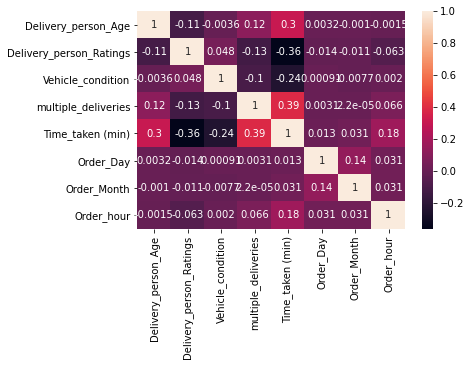

In [28]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

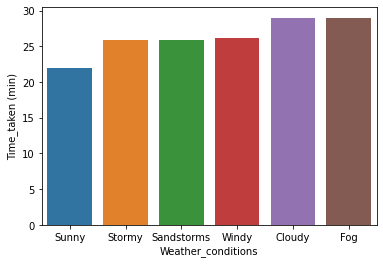

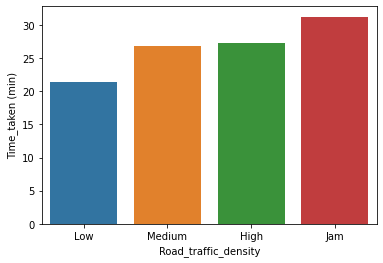

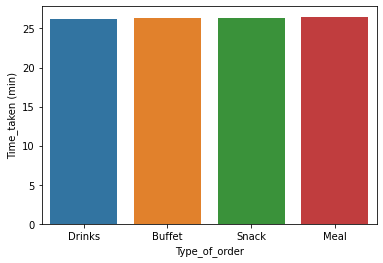

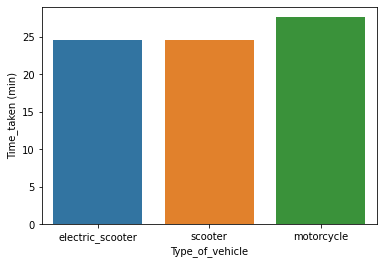

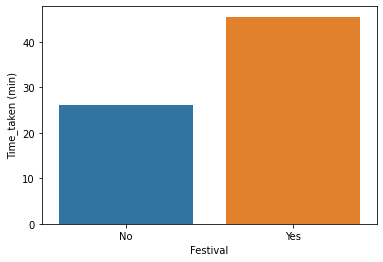

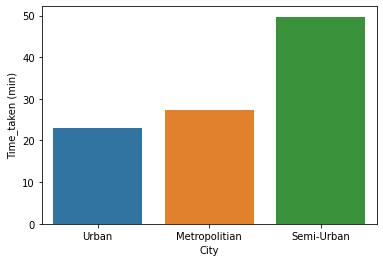

In [29]:
for col in categorical_columns:
    temp_df = df1.groupby(by=col)['Time_taken (min)'].mean().sort_values().reset_index()
    sns.barplot(x=col, y='Time_taken (min)', data=temp_df)
    plt.show()

# Observations from visualizations
- Delivery time is highest during cloudy, foggy weather and lowest when sunny.
- High delivery time when traffic jam and less when traffic is low.
- Type of order has no impact on delivery time.
- Electric scooters, scooters are faster then motorcycles.
- High delivery time during festivals.
- Less delivery time in urban areas and high in semi-urban areas.
- Less delivery time on tuesdays and more on fridays.


In [30]:
df1.describe()

,Delivery_person_Age,Delivery_person_Ratings,Vehicle_condition,multiple_deliveries,Time_taken (min),Order_Day,Order_Month,Order_hour
count,39157.000000,39107.000000,39349.000000,39349.000000,39349.000000,39349.000000,39349.000000,39349.000000
mean,29.583089,4.634480,0.999517,0.743272,26.344227,2.933950,4.253755,17.404483
std,5.764301,0.314768,0.816512,0.572366,9.371023,1.973645,2.923221,4.805488
min,20.000000,2.500000,0.000000,0.000000,10.000000,0.000000,1.000000,1.000000
25%,25.000000,4.500000,0.000000,0.000000,19.000000,1.000000,3.000000,15.000000
50%,30.000000,4.700000,1.000000,1.000000,26.000000,3.000000,3.000000,19.000000
75%,35.000000,4.900000,2.000000,1.000000,32.000000,5.000000,5.000000,21.000000
max,39.000000,5.000000,2.000000,3.000000,54.000000,6.000000,12.000000,23.000000


<Figure size 432x288 with 0 Axes>

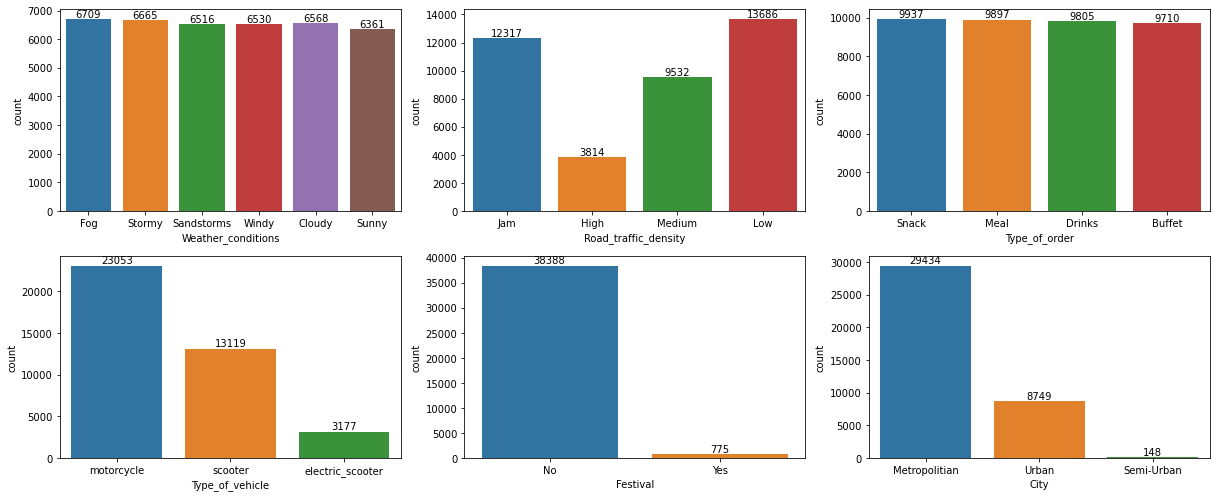

In [31]:
plt.suptitle("Count Plot Of Catigorical Features")
plt.figure(figsize=(17,10))
for i in range(0,len(categorical_columns)):
    plt.subplot(3,3,i+1)
    ax = sns.countplot(x = df1[categorical_columns[i]])
    # Add annotations
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    plt.tight_layout()
    # plt.show()

In [32]:
# plt.suptitle("Count Plot Of Catigorical Features")
# plt.figure(figsize=(17,10))
# for i in range(0,len(categorical_columns)):
#     plt.subplot(3,3,i+1)
#     sns.countplot(x = df1[categorical_columns[i]])
#     plt.tight_layout()
#     # plt.show()

- Majority of delivery persons use motorcycle.
- Majority of deliveries are in metropolitian area.
- Traffic is mostly either low or jam.

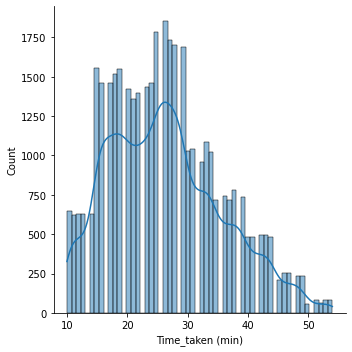

In [33]:
sns.displot(df1['Time_taken (min)'], kde=True)

In [34]:
categorical_columns = df1.columns[df1.dtypes=="object"]
numerical_columns = df1.columns[df1.dtypes!='object']
print("Numerical columns: ", numerical_columns)
print("Categotical columns:", categorical_columns)

Numerical columns:  Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Order_Day', 'Order_Month',
       'Order_hour'],
      dtype='object')
Categotical columns: Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


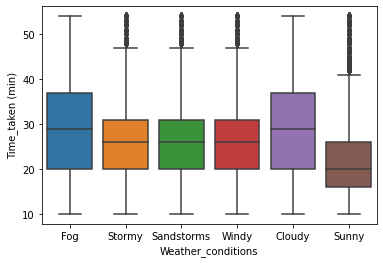

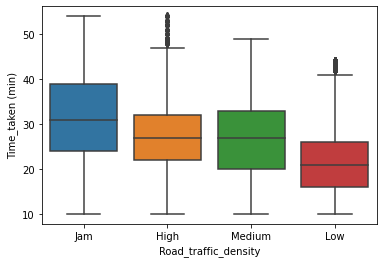

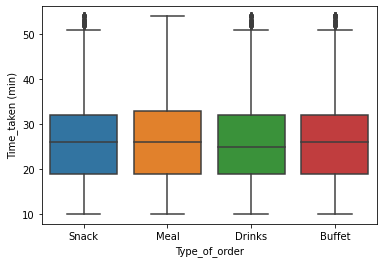

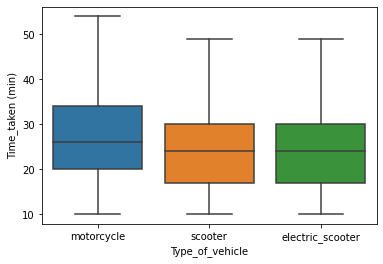

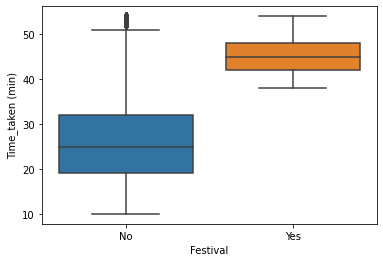

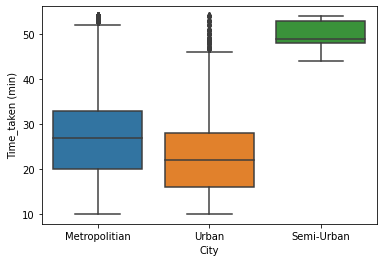

In [35]:
for col in categorical_columns:
    sns.boxplot(x=col, y='Time_taken (min)', data=df1)
    plt.show()

- Delivery takes less time when weather is sunny and more when there is fog or cloudy weather.
- Delivery takes more time when traffic is jam and less time when traffic is low.
- Type of order and vehicle type have no significant impact on delivery time.
- Delivery time is high when there is a festival.
- Delivery time is significantly higher in semi urban regions than other regions.

In [36]:
# Type of order is not adding any value to the data, so dropping it
df1.drop('Type_of_order', axis=1, inplace=True)

In [37]:
numerical_columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)', 'Order_Day', 'Order_Month',
       'Order_hour'],
      dtype='object')

c:\Users\Ajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


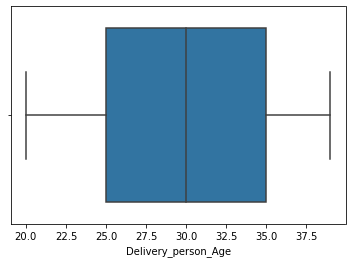

c:\Users\Ajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


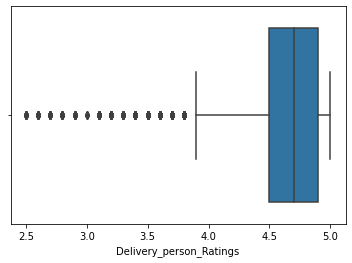

c:\Users\Ajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


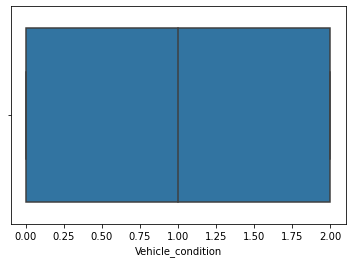

c:\Users\Ajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


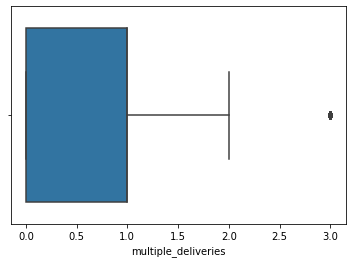

c:\Users\Ajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


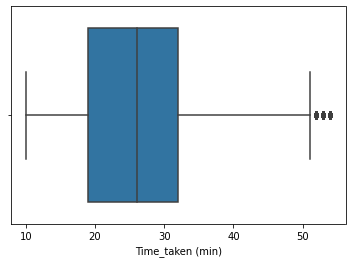

c:\Users\Ajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


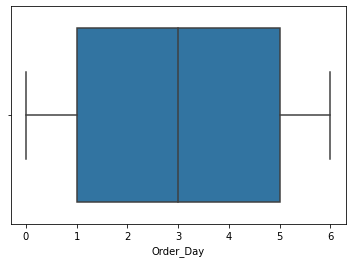

c:\Users\Ajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


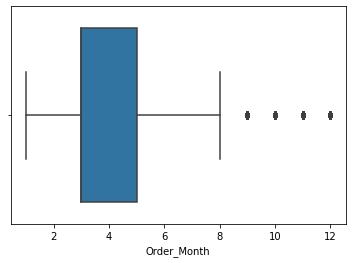

c:\Users\Ajit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


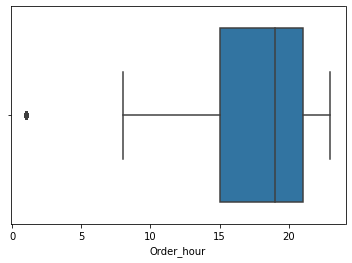

In [38]:
for col in numerical_columns:
    sns.boxplot(df1[col])
    plt.show()

/n


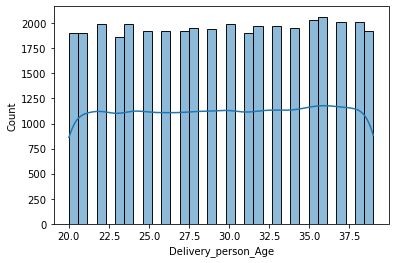

/n


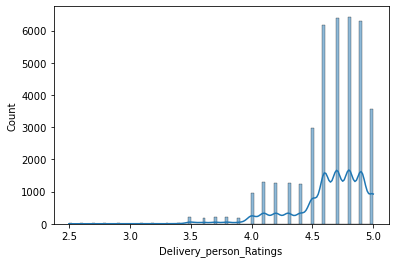

/n


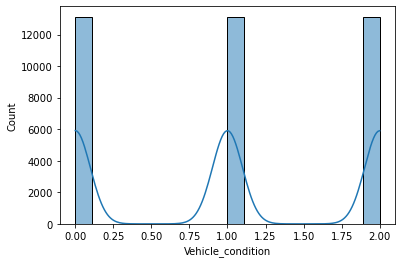

/n


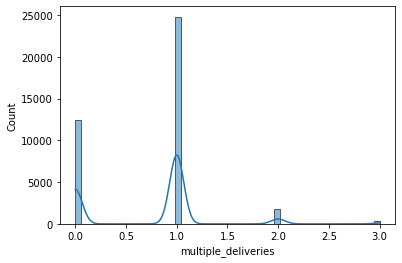

/n


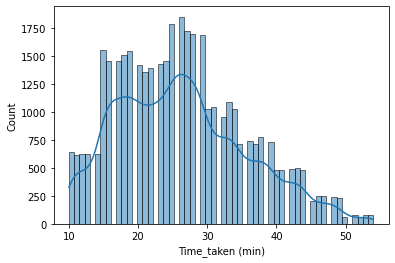

/n


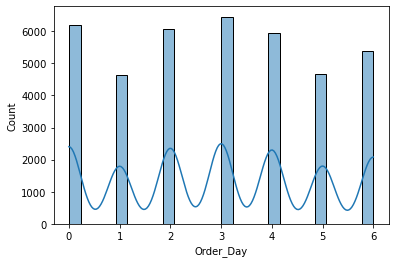

/n


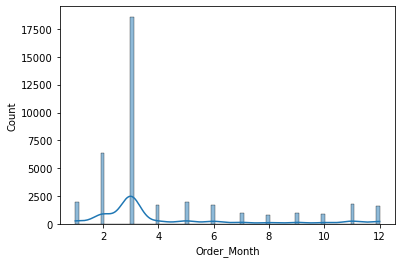

/n


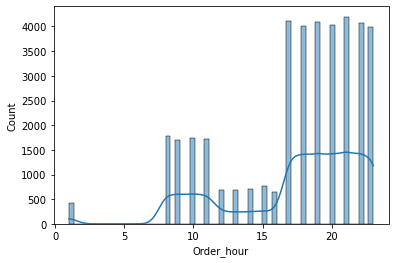

In [39]:
for col in numerical_columns:
    sns.histplot(x=col, data=df1, kde=True)
    print('/n')
    plt.show()

# Dataset is ready for model building and further processing

In [40]:
X = df1.drop(labels='Time_taken (min)',axis=1)
y = df1[['Time_taken (min)']]

In [41]:
X.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Order_Day,Order_Month,Order_hour
0,36.0,4.2,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,4,12,21
1,21.0,4.7,Stormy,High,1,motorcycle,1.0,No,Metropolitian,6,2,14
2,23.0,4.7,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,6,4,17
3,34.0,4.3,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,6,2,9
4,24.0,4.7,Fog,Jam,1,scooter,1.0,No,Metropolitian,0,2,19


In [42]:
y.head()

,Time_taken (min)
0,46
1,23
2,21
3,20
4,41


In [43]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [44]:
cat_cols

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle',
       'Festival', 'City'],
      dtype='object')

In [45]:
num_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Order_Day', 'Order_Month', 'Order_hour'],
      dtype='object')

In [46]:
# Defining ranking for each ordinal variable
traffic_map = ['Low', 'Medium', 'High', 'Jam']
weather_map = ['Sunny', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Fog']
festival_map = ['No', 'Yes']
city_map = ['Semi-Urban', 'Urban', 'Metropolitian']
vehicle_map = ['scooter', 'electric_scooter', 'motorcycle']

In [47]:
from sklearn.impute import SimpleImputer #hanlding missing values
from sklearn.preprocessing import StandardScaler #feature scaling
from sklearn.preprocessing import OrdinalEncoder #ordinal encoding

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [48]:
# Numerical pipeline
num_pipeline = Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
    ]
)

# Categorical pipeline
cat_pipeline = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder', OrdinalEncoder(categories=[weather_map, traffic_map, vehicle_map, festival_map, city_map])),
    ('scaler',StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    [
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
    ]

)


In [49]:
## Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [50]:
df1[cat_cols].dtypes

Weather_conditions      object
Road_traffic_density    object
Type_of_vehicle         object
Festival                object
City                    object
dtype: object

In [51]:
df1[num_cols].dtypes

Delivery_person_Age        float64
Delivery_person_Ratings    float64
Vehicle_condition            int64
multiple_deliveries        float64
Order_Day                    int64
Order_Month                  int64
Order_hour                   int32
dtype: object

In [52]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns= preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns= preprocessor.get_feature_names_out())

In [53]:
X_train.head()

,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,num_pipeline__Order_Day,num_pipeline__Order_Month,num_pipeline__Order_hour,cat_pipeline__Weather_conditions,cat_pipeline__Road_traffic_density,cat_pipeline__Type_of_vehicle,cat_pipeline__Festival,cat_pipeline__City
0,-0.449752,0.848664,-1.227216,-1.299389,0.544170,-0.427024,0.124417,1.456014,-0.300853,0.810709,-0.140876,0.534907
1,-0.972834,0.848664,1.222591,-1.299389,-0.973715,0.256711,-0.500292,-0.891300,-0.300853,0.810709,-0.140876,0.534907
2,-1.670278,0.211284,1.222591,-1.299389,0.544170,-0.427024,0.957363,-0.304472,-1.103439,0.810709,-0.140876,0.534907
3,-1.321556,0.848664,-1.227216,0.444866,-1.479677,-1.110759,-0.083819,1.456014,-0.300853,0.810709,-0.140876,0.534907
4,-1.321556,-0.107406,-0.002312,-1.299389,1.556093,0.940446,-1.541475,-0.891300,-1.103439,0.810709,-0.140876,0.534907


In [62]:
X_train.columns.tolist()[0]

'num_pipeline__Delivery_person_Age'

In [54]:
X_train.isnull().sum()

num_pipeline__Delivery_person_Age        0
num_pipeline__Delivery_person_Ratings    0
num_pipeline__Vehicle_condition          0
num_pipeline__multiple_deliveries        0
num_pipeline__Order_Day                  0
num_pipeline__Order_Month                0
num_pipeline__Order_hour                 0
cat_pipeline__Weather_conditions         0
cat_pipeline__Road_traffic_density       0
cat_pipeline__Type_of_vehicle            0
cat_pipeline__Festival                   0
cat_pipeline__City                       0
dtype: int64

In [65]:
X_train['num_pipeline__Delivery_person_Age']

0       -0.449752
1       -0.972834
2       -1.670278
3       -1.321556
4       -1.321556
           ...   
27539   -1.670278
27540   -1.321556
27541   -0.275391
27542   -0.101030
27543   -0.449752
Name: num_pipeline__Delivery_person_Age, Length: 27544, dtype: float64

In [55]:
X_test.head()

,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,num_pipeline__Order_Day,num_pipeline__Order_Month,num_pipeline__Order_hour,cat_pipeline__Weather_conditions,cat_pipeline__Road_traffic_density,cat_pipeline__Type_of_vehicle,cat_pipeline__Festival,cat_pipeline__City
0,-0.624113,-0.107406,-1.227216,-1.299389,0.038208,-0.427024,0.332654,0.282357,1.304319,0.810709,-0.140876,0.534907
1,-0.798474,0.211284,-0.002312,0.444866,0.544170,-0.427024,0.540890,-0.304472,1.304319,-1.348882,-0.140876,0.534907
2,-1.321556,0.211284,1.222591,0.444866,1.556093,-0.427024,-0.083819,1.456014,-0.300853,-0.269086,-0.140876,0.534907
3,0.945136,-1.382165,-1.227216,0.444866,-0.973715,0.256711,1.165600,-0.891300,-1.103439,0.810709,-0.140876,0.534907
4,1.293858,0.848664,-1.227216,0.444866,1.556093,-0.427024,-1.957948,1.456014,-1.103439,0.810709,-0.140876,0.534907


In [56]:
X_test.isnull().sum()

num_pipeline__Delivery_person_Age        0
num_pipeline__Delivery_person_Ratings    0
num_pipeline__Vehicle_condition          0
num_pipeline__multiple_deliveries        0
num_pipeline__Order_Day                  0
num_pipeline__Order_Month                0
num_pipeline__Order_hour                 0
cat_pipeline__Weather_conditions         0
cat_pipeline__Road_traffic_density       0
cat_pipeline__Type_of_vehicle            0
cat_pipeline__Festival                   0
cat_pipeline__City                       0
dtype: int64

In [ ]:
# Model training
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

1. Linear Regression

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
regression.coef_

array([[ 2.19323477, -2.44891287, -1.70827018,  1.90633084, -0.01441325,
         0.17686448,  0.58804885,  1.91663959,  3.11207429,  0.27159743,
         1.44399286,  0.65549839]])

In [ ]:
regression.intercept_

array([26.34867848])

In [ ]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'DTR_hyperpara_tuned':DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=2)
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 6.292289263437883
MAE: 5.033947172469993
R2 score 54.81307860456732


Lasso
Model Training Performance
RMSE: 6.772589821370235
MAE: 5.4217291228389195
R2 score 47.65141560890608


Ridge
Model Training Performance
RMSE: 6.292290079820396
MAE: 5.033947702742281
R2 score 54.813066879163976


Elasticnet
Model Training Performance
RMSE: 6.850540034347494
MAE: 5.500738114083727
R2 score 46.43945195073431


DecisionTreeRegressor
Model Training Performance
RMSE: 6.224594276686669
MAE: 4.620330368487929
R2 score 55.78012678901655


DTR_hyperpara_tuned
Model Training Performance
RMSE: 6.0742210702312365
MAE: 4.691427831712283
R2 score 57.890839552803406




In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
evaluate_model(y_test, y_pred)

(4.612155866158408, 6.215246450230508, 0.5591284204706217)

In [ ]:
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
param_grid = {
    'max_depth': [2,3,4,5],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3]
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [ ]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [ ]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

In [ ]:
model2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=2)

In [ ]:
model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=3)

In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
evaluate_model(y_test, y_pred)

(4.691427831712283, 6.0742210702312365, 0.5789083955280341)